# Downloading UCF101 Action Recognition Dataset

This script downloads the **UCF101 Action Recognition** dataset using `kagglehub`.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("matthewjansen/ucf101-action-recognition")

print("Path to dataset files:", path)

c:\Users\XYMA_HPC\anaconda3\envs\smartanfittech\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 6.53G/6.53G [06:06<00:00, 19.1MB/s]  

Extracting files...


Path to dataset files: C:\Users\XYMA_HPC\.cache\kagglehub\datasets\matthewjansen\ucf101-action-recognition\versions\4


In [3]:
import os

dataset_path = "C:/Users/XYMA_HPC/.cache/kagglehub/datasets/matthewjansen/ucf101-action-recognition/versions/4"
print(os.listdir(dataset_path))

['test', 'test.csv', 'train', 'train.csv', 'val', 'val.csv']


## Listing Sample Files from Train, Validation, and Test Sets

This script prints sample files from the **train, validation, and test** directories of the **UCF101 Action Recognition** dataset.


In [ ]:
print("Train Files:", os.listdir(os.path.join(dataset_path, "train"))[:5])
print("Val Files:", os.listdir(os.path.join(dataset_path, "val"))[:5])
print("Test Files:", os.listdir(os.path.join(dataset_path, "test"))[:5])

Train Files: ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam']
Val Files: ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam']
Test Files: ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam']


In [5]:
import shutil

shutil.move(dataset_path, "D:/Mathi/HAR")
print("Dataset moved successfully!")

Dataset moved successfully!


## Import the Required LIbraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Defining Paths for UCF101 Dataset and CSV Files

In [ ]:
dataset_path = "D:/Mathi/HAR/HARDataset"
train_csv_path = "D:/Mathi/HAR/HARDataset/train.csv"
val_csv_path = "D:/Mathi/HAR/HARDataset/val.csv"
test_csv_path = "D:/Mathi/HAR/HARDataset/test.csv"

## Loading Train, Validation, and Test CSV Files

In [4]:
train_df = pd.read_csv(train_csv_path)
val_df = pd.read_csv(val_csv_path)
test_df = pd.read_csv(test_csv_path)

In [5]:
train_df.head(10)

,clip_name,clip_path,label
0,v_Swing_g05_c02,/train/Swing/v_Swing_g05_c02.avi,Swing
1,v_Swing_g21_c03,/train/Swing/v_Swing_g21_c03.avi,Swing
2,v_Swing_g07_c01,/train/Swing/v_Swing_g07_c01.avi,Swing
3,v_Swing_g24_c04,/train/Swing/v_Swing_g24_c04.avi,Swing
4,v_Swing_g20_c03,/train/Swing/v_Swing_g20_c03.avi,Swing
5,v_Swing_g12_c04,/train/Swing/v_Swing_g12_c04.avi,Swing
6,v_Swing_g04_c01,/train/Swing/v_Swing_g04_c01.avi,Swing
7,v_Swing_g21_c01,/train/Swing/v_Swing_g21_c01.avi,Swing
8,v_Swing_g25_c01,/train/Swing/v_Swing_g25_c01.avi,Swing
9,v_Swing_g02_c02,/train/Swing/v_Swing_g02_c02.avi,Swing


In [6]:
len(train_df['label'])

10055

## Visualisation of Activity

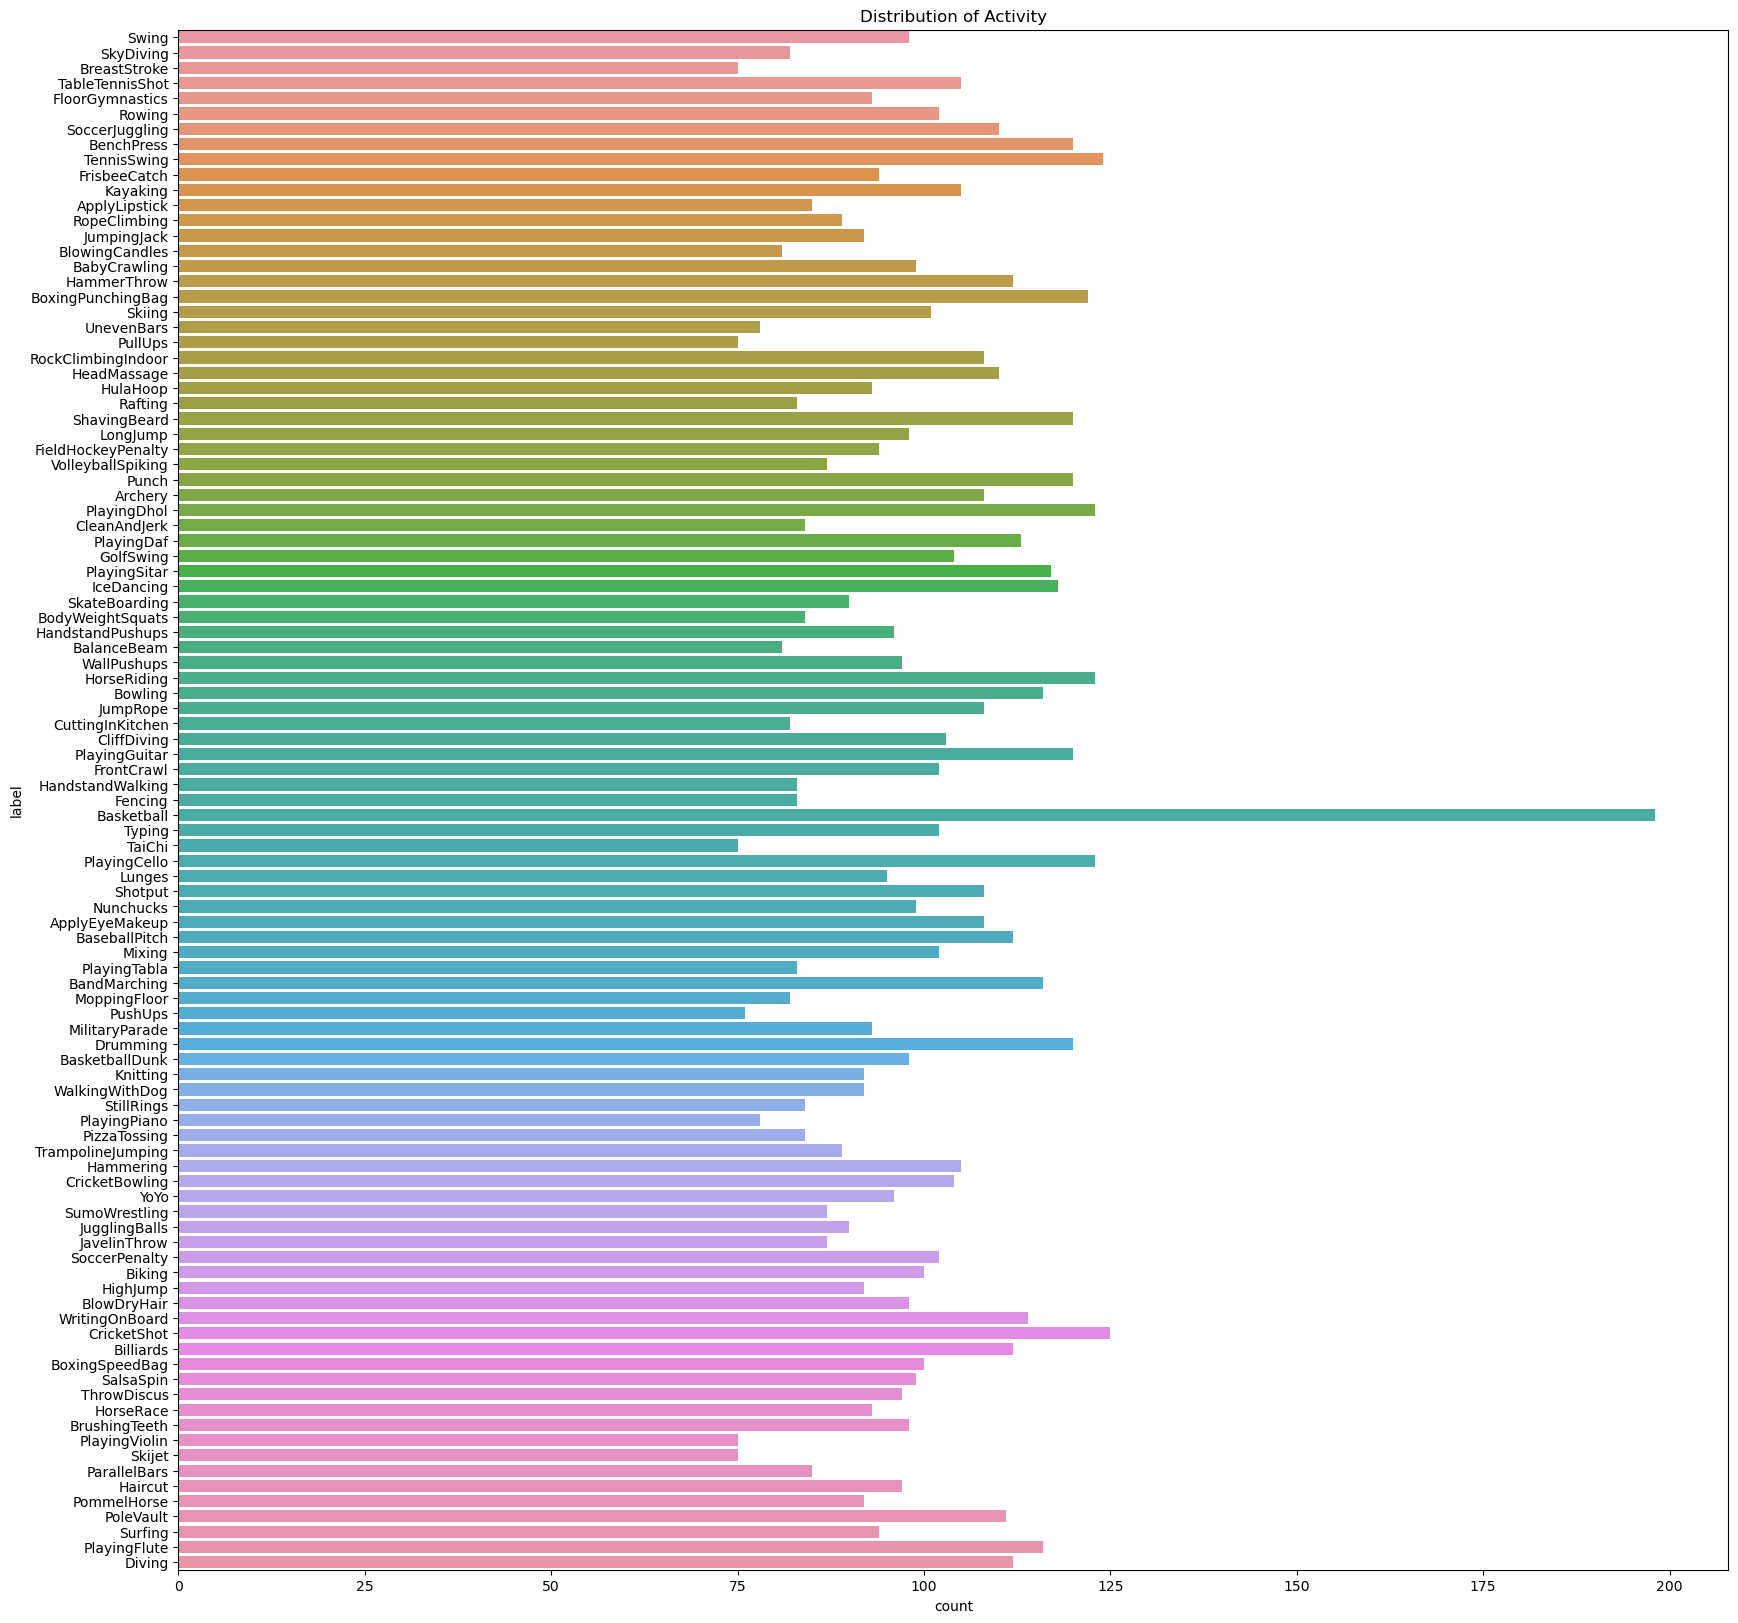

In [7]:
plt.figure(figsize=(20,20))
sns.countplot(y=train_df['label'])
plt.title('Distribution of Activity')
plt.show()

## Filtering Dataset for Selected Labels

This script filters the dataset to include only manually selected labels and displays their distribution.

In [8]:
# List of manually selected labels
selected_labels = ['Swing', 'SkyDiving', 'FloorGymnastics', 'Diving', 'Surfing',
                   'Basketball', 'GolfSwing', 'PlayingPiano', 'PLayingGuitar', 'HorseRace']

# Filter train, validation, and test DataFrames
sl_train_df = train_df[train_df['label'].isin(selected_labels)].copy()
sl_val_df = val_df[val_df['label'].isin(selected_labels)].copy()
sl_test_df = test_df[test_df['label'].isin(selected_labels)].copy()

# Display label counts for each set
print("Train Label Distribution:\n", sl_train_df['label'].value_counts(), "\n")
print("Validation Label Distribution:\n", sl_val_df['label'].value_counts(), "\n")
print("Test Label Distribution:\n", sl_test_df['label'].value_counts(), "\n")


Train Label Distribution:
 label
Basketball         198
Diving             112
GolfSwing          104
Swing               98
Surfing             94
FloorGymnastics     93
HorseRace           93
SkyDiving           82
PlayingPiano        78
Name: count, dtype: int64 

Validation Label Distribution:
 label
Basketball         33
Diving             19
GolfSwing          17
Swing              16
FloorGymnastics    16
Surfing            16
HorseRace          15
SkyDiving          14
PlayingPiano       13
Name: count, dtype: int64 

Test Label Distribution:
 label
Basketball         34
Diving             19
GolfSwing          18
Swing              17
FloorGymnastics    16
HorseRace          16
Surfing            16
SkyDiving          14
PlayingPiano       14
Name: count, dtype: int64 



## Visualisation of Selected aActivity of Training

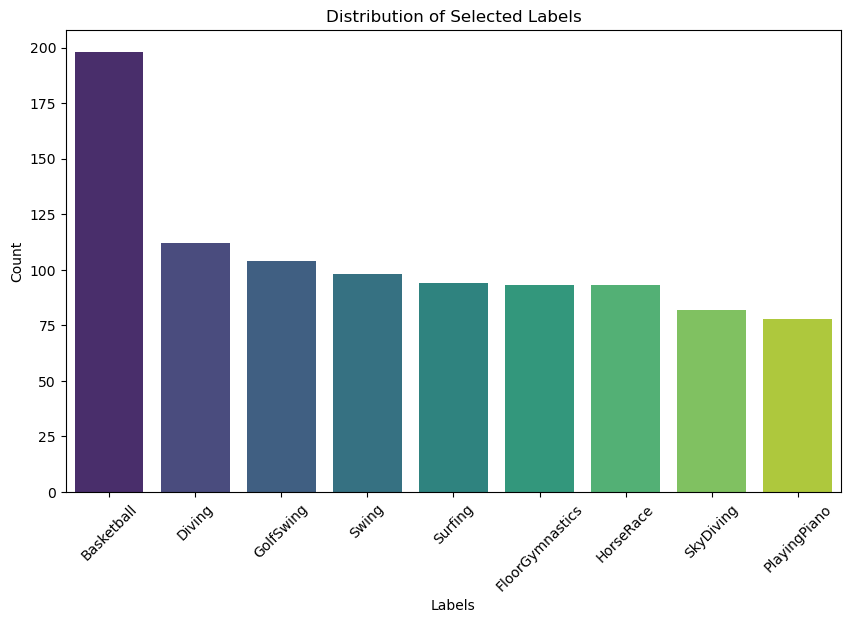

In [9]:
# Count the occurrences of each label
label_counts = sl_train_df['label'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Customize the plot
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution of Selected Labels")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


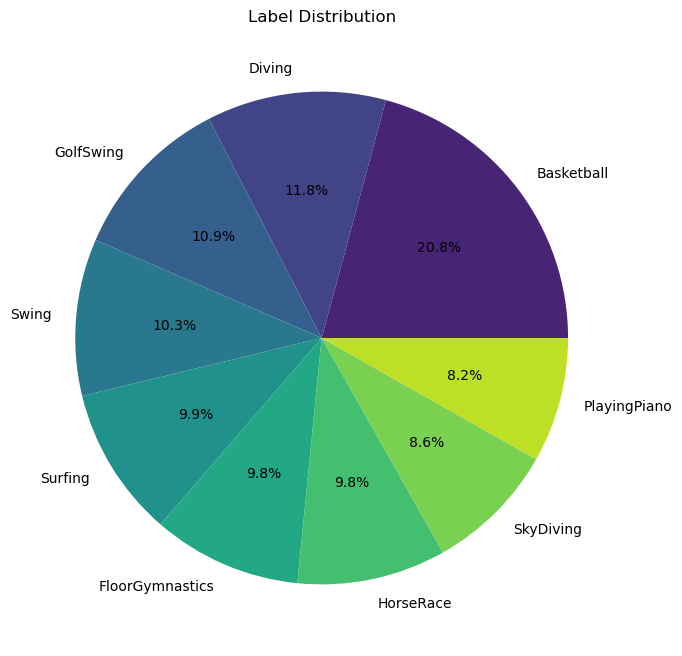

In [10]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(label_counts)))

# Customize the plot
plt.title("Label Distribution")
plt.show()


## Generating Full Clip Paths for Selected Dataset

This script appends the dataset base path to each video clip's filename, creating full paths for training, validation, and test sets.

In [11]:
base_path = "D:/Mathi/HAR/HARDataset/"

# Add base_path to the start of each element in 'clip_path'
sl_train_df['full_clip_path'] = base_path + sl_train_df['clip_path']

# Display the updated DataFrame
print(sl_train_df[['clip_name', 'full_clip_path']].head())


         clip_name                                     full_clip_path
0  v_Swing_g05_c02  D:/Mathi/HAR/HARDataset//train/Swing/v_Swing_g...
1  v_Swing_g21_c03  D:/Mathi/HAR/HARDataset//train/Swing/v_Swing_g...
2  v_Swing_g07_c01  D:/Mathi/HAR/HARDataset//train/Swing/v_Swing_g...
3  v_Swing_g24_c04  D:/Mathi/HAR/HARDataset//train/Swing/v_Swing_g...
4  v_Swing_g20_c03  D:/Mathi/HAR/HARDataset//train/Swing/v_Swing_g...


In [12]:
base_path = "D:/Mathi/HAR/HARDataset/"

# Add base_path to the start of each element in 'clip_path'
sl_test_df['full_clip_path'] = base_path + sl_test_df['clip_path']

# Display the updated DataFrame
print(sl_test_df[['clip_name', 'full_clip_path']].head())

         clip_name                                     full_clip_path
0  v_Swing_g21_c02  D:/Mathi/HAR/HARDataset//test/Swing/v_Swing_g2...
1  v_Swing_g21_c06  D:/Mathi/HAR/HARDataset//test/Swing/v_Swing_g2...
2  v_Swing_g20_c05  D:/Mathi/HAR/HARDataset//test/Swing/v_Swing_g2...
3  v_Swing_g04_c03  D:/Mathi/HAR/HARDataset//test/Swing/v_Swing_g0...
4  v_Swing_g19_c03  D:/Mathi/HAR/HARDataset//test/Swing/v_Swing_g1...


In [13]:
base_path = "/D:/Mathi/HAR/HARDataset/"

# Add base_path to the start of each element in 'clip_path'
sl_val_df['full_clip_path'] = base_path + sl_val_df['clip_path']

# Display the updated DataFrame
print(sl_val_df[['clip_name', 'full_clip_path']].head())

         clip_name                                     full_clip_path
0  v_Swing_g22_c05  /D:/Mathi/HAR/HARDataset//val/Swing/v_Swing_g2...
1  v_Swing_g25_c02  /D:/Mathi/HAR/HARDataset//val/Swing/v_Swing_g2...
2  v_Swing_g06_c07  /D:/Mathi/HAR/HARDataset//val/Swing/v_Swing_g0...
3  v_Swing_g03_c02  /D:/Mathi/HAR/HARDataset//val/Swing/v_Swing_g0...
4  v_Swing_g02_c05  /D:/Mathi/HAR/HARDataset//val/Swing/v_Swing_g0...


## Accessing the Video through MediaPy

In [19]:
import cv2

video_path = "D:/Mathi/HAR/HARDataset/train/Swing/v_Swing_g05_c02.avi"
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow('Video', frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):  # Press 'q' to exit
        break

cap.release()
cv2.destroyAllWindows()


# Preparing Dataset for CNN-Based Human Activity Recognition  

This script loads and preprocesses the **UCF101** dataset for training a CNN model to recognize human activities.  

## Step 1: Import Required Libraries  
- **PyTorch & Torchvision** for deep learning and dataset handling.  
- **OpenCV & NumPy** for video frame extraction and preprocessing.  
- **Pandas & Scikit-learn** for handling dataset labels and encoding.  

## Step 2: Set Device  
- Determines if CUDA (GPU) is available and sets the device accordingly.  

## Step 3: Load and Encode Dataset  
- Loads training, validation, and test datasets.  
- Encodes categorical labels into numerical values using `LabelEncoder`.  

## Step 4: Define Video Preprocessing  
- Resizes all frames to `(128x128)` for consistency.  
- Normalizes pixel values to the range `[-1,1]`.  

## Step 5: Extract Frames from Videos  
- Reads frames from each video file.  
- Selects `16` evenly spaced frames per video.  
- Ensures all videos have exactly `16` frames, adding padding if needed.  

## Step 6: Create Custom VideoDataset Class  
- Converts each video into a tensor with shape `(C, T, H, W)`.  
- Applies resizing and normalization transformations.  

## Step 7: Load Data with DataLoader  
- Creates PyTorch `DataLoader` instances for training, validation, and test sets.  
- Uses a batch size of `4` for efficient training and evaluation.  


In [20]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from PIL import Image, ImageDraw, ImageFont
print("PIL successfully imported!")

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load dataset 
df_train = sl_train_df 
df_val = sl_val_df
df_test = sl_test_df

# Encode labels
label_encoder = LabelEncoder()
df_train["label_encoded"] = label_encoder.fit_transform(df_train["label"])
df_val["label_encoded"] = label_encoder.transform(df_val["label"])
df_test["label_encoded"] = label_encoder.transform(df_test["label"])

# Video Preprocessing
transform = Compose([
    Resize((128, 128)),  # Resize frames
    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize for 3 channels (RGB)
])

# Extract frames from videos
img_height, img_width = 128, 128  # Resize for CNN
frames_per_video = 16  # Fixed number of frames per video

def extract_frames(video_path, max_frames=frames_per_video):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_interval = max(1, total_frames // max_frames)
    
    count = 0
    while len(frames) < max_frames:
        cap.set(cv2.CAP_PROP_POS_FRAMES, count)
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (img_width, img_height))  # Resize
        frame = frame / 255.0  # Normalize
        frames.append(frame)
        count += frame_interval

    cap.release()

    # Pad with last frame if not enough frames
    while len(frames) < max_frames:
        frames.append(frames[-1])

    return np.array(frames)  # (T, H, W, C)


# Updated VideoDataset using extract_frames
class VideoDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        video_path = self.df.iloc[idx]["full_clip_path"]
        label = self.df.iloc[idx]["label_encoded"]

        video = extract_frames(video_path)  # (T, H, W, C)
        video = torch.tensor(video, dtype=torch.float32).permute(3, 0, 1, 2)  # (C, T, H, W)

        if self.transform:
            video = torch.stack([self.transform(frame) for frame in video.permute(1, 0, 2, 3)])  # Apply transform
            video = video.permute(1, 0, 2, 3)  # Convert back to (C, T, H, W)

        return video, label


# Create dataset instances
train_dataset = VideoDataset(df_train, transform=transform)
val_dataset = VideoDataset(df_val, transform=transform)
test_dataset = VideoDataset(df_test, transform=transform)

# Load Data
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)


PIL successfully imported!


# 3D CNN Model for Video Classification  

This module defines a **3D Convolutional Neural Network (CNN)** for video classification, designed to capture both spatial and temporal features from video frames.  

## Model Architecture  

- **3D Convolutional Layers**: Extracts spatial and temporal features from video frames.  
- **Batch Normalization**: Stabilizes training and accelerates convergence.  
- **Max Pooling Layers**: Reduces spatial dimensions while preserving key features.  
- **Fully Connected Layers**: Transforms extracted features into class predictions.  

## Layers Overview  

1. **Conv3D + BatchNorm + ReLU + MaxPool** (32 filters)  
2. **Conv3D + BatchNorm + ReLU + MaxPool** (64 filters)  
3. **Conv3D + BatchNorm + ReLU + MaxPool** (128 filters)  
4. **Conv3D + BatchNorm + ReLU + MaxPool** (256 filters)  
5. **Fully Connected Layer**: Maps extracted features to 512 neurons.  
6. **Output Layer**: Produces class scores for activity classification.  

## Forward Pass  

- Input shape: `(batch_size, 3, frames, height, width)`  
- Passes through **four convolutional blocks** with activation and pooling.  
- Flattens the feature map before **fully connected layers**.  
- Final output: Logits for each activity class.  

This model is designed for **human activity recognition** and can be trained on datasets like **UCF101** to classify various activities based on video frames.  


In [21]:
import torch.nn as nn
import torch.nn.functional as F

class Video3DCNN(nn.Module):
    def __init__(self, num_classes):
        super(Video3DCNN, self).__init__()

        self.conv1 = nn.Conv3d(in_channels=3, out_channels=32, kernel_size=(3,3,3), stride=1, padding=1)
        self.bn1 = nn.BatchNorm3d(32)
        self.pool1 = nn.MaxPool3d(kernel_size=(1,2,2))

        self.conv2 = nn.Conv3d(32, 64, kernel_size=(3,3,3), stride=1, padding=1)
        self.bn2 = nn.BatchNorm3d(64)
        self.pool2 = nn.MaxPool3d(kernel_size=(2,2,2))

        self.conv3 = nn.Conv3d(64, 128, kernel_size=(3,3,3), stride=1, padding=1)
        self.bn3 = nn.BatchNorm3d(128)
        self.pool3 = nn.MaxPool3d(kernel_size=(2,2,2))

        self.conv4 = nn.Conv3d(128, 256, kernel_size=(3,3,3), stride=1, padding=1)
        self.bn4 = nn.BatchNorm3d(256)
        self.pool4 = nn.MaxPool3d(kernel_size=(2,2,2))

        self.fc1 = nn.Linear(256 * (frames_per_video // 8) * (img_height // 16) * (img_width // 16), 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = self.pool4(F.relu(self.bn4(self.conv4(x))))

        x = x.view(x.shape[0], -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x


# Model Setup, Loss Function, and Optimizer  

This section initializes the **3D CNN model**, defines the **loss function**, and configures the **optimizer** for training.  

## Model Initialization  
- **Number of Classes**: Dynamically set based on the dataset labels.  
- **Device Selection**: Model is transferred to GPU (`cuda`) if available, otherwise CPU.  

## Loss Function  
- **CrossEntropyLoss**: Suitable for multi-class classification, penalizing incorrect predictions.  

## Optimizer  
- **Adam Optimizer**: Used for efficient parameter updates with adaptive learning rates.  
- **Learning Rate (`lr=0.001`)**: Controls the step size during optimization.  
- **Weight Decay (`1e-4`)**: Regularization term to prevent overfitting.  

## Learning Rate Scheduler (Optional)  
- **StepLR**: Reduces learning rate by a factor (`gamma=0.1`) every `10` epochs.  
- Helps stabilize training and improve generalization over time.  


In [22]:
# Set up model, loss, optimizer
num_classes = len(df_train["label"].unique())
model = Video3DCNN(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Optional: Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


# Training the 3D CNN Model  

This function trains the **3D CNN model** on the **training dataset** and evaluates its performance on the **validation dataset**.  

## Training Procedure  
- **Model Transfer**: Moves the model to GPU for faster computations.  
- **Gradient Updates**:  
  - Clears previous gradients (`optimizer.zero_grad()`).  
  - Computes loss and backpropagates (`loss.backward()`).  
  - Updates model parameters (`optimizer.step()`).  
- **Accuracy Calculation**: Compares predictions with ground truth labels.  

## Validation Phase  
- **Evaluation Mode (`model.eval()`)**: Disables dropout and batch normalization updates.  
- **No Gradient Computation (`torch.no_grad()`)**: Reduces memory usage and speeds up inference.  
- **Accuracy and Loss Calculation**: Computes model performance on the validation dataset.  

## Learning Rate Adjustment  
- Uses a **StepLR scheduler** to decay the learning rate after every few epochs.  

This structured approach ensures **effective training and model convergence** for **human activity recognition**.

In [26]:
def train_model(model, train_loader, val_loader, epochs=20):
    model.to(device)  # Move model to GPU

    for epoch in range(epochs):
        model.train()
        train_loss, correct, total = 0, 0, 0

        for videos, labels in train_loader:
            videos, labels = videos.to(device, non_blocking=True), labels.to(device, dtype=torch.long, non_blocking=True)  

            optimizer.zero_grad()
            outputs = model(videos)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

        # Validation phase
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for videos, labels in val_loader:
                videos, labels = videos.to(device, non_blocking=True), labels.to(device, dtype=torch.long, non_blocking=True)  

                outputs = model(videos)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        val_acc = correct / total
        print(f"Validation Loss: {val_loss:.4f}, Validation Acc: {val_acc:.4f}")

        # Update learning rate
        scheduler.step()

# Move model and criterion to GPU
model.to(device)
criterion.to(device)  # Keep this

# Train the model
train_model(model, train_loader, val_loader, epochs=20)


Epoch 1/20, Loss: 306.9142, Train Acc: 0.5578
Validation Loss: 55.0773, Validation Acc: 0.5975
Epoch 2/20, Loss: 260.9632, Train Acc: 0.6313
Validation Loss: 41.1696, Validation Acc: 0.7296
Epoch 3/20, Loss: 216.8156, Train Acc: 0.7059
Validation Loss: 60.6623, Validation Acc: 0.6226
Epoch 4/20, Loss: 178.6807, Train Acc: 0.7553
Validation Loss: 36.9108, Validation Acc: 0.6730
Epoch 5/20, Loss: 135.6116, Train Acc: 0.8267
Validation Loss: 29.8800, Validation Acc: 0.7862
Epoch 6/20, Loss: 136.7100, Train Acc: 0.7962
Validation Loss: 32.8081, Validation Acc: 0.7673
Epoch 7/20, Loss: 120.5078, Train Acc: 0.8277
Validation Loss: 25.2907, Validation Acc: 0.8113
Epoch 8/20, Loss: 79.1405, Train Acc: 0.8897
Validation Loss: 27.7943, Validation Acc: 0.7610
Epoch 9/20, Loss: 79.2011, Train Acc: 0.8887
Validation Loss: 21.0438, Validation Acc: 0.8176
Epoch 10/20, Loss: 70.2332, Train Acc: 0.9086
Validation Loss: 21.9751, Validation Acc: 0.8302
Epoch 11/20, Loss: 35.2862, Train Acc: 0.9506
Valida

### **Training Summary**  

- **Steady Improvement**: Training accuracy increased from **55.78%** to **98.74%**, demonstrating effective learning.  
- **Validation Performance**: Accuracy reached **92.45%**, indicating good generalization, though validation loss fluctuated slightly.  
- **Potential Overfitting**: The gap between training and validation performance suggests minor overfitting.  
- **Hardware Limitations**: Due to limited computational resources, extensive **hyperparameter tuning** (such as adjusting learning rates, batch sizes, and regularization techniques) was not feasible.  
- **Next Steps**: Further optimization with better hardware could improve model performance and stability.  


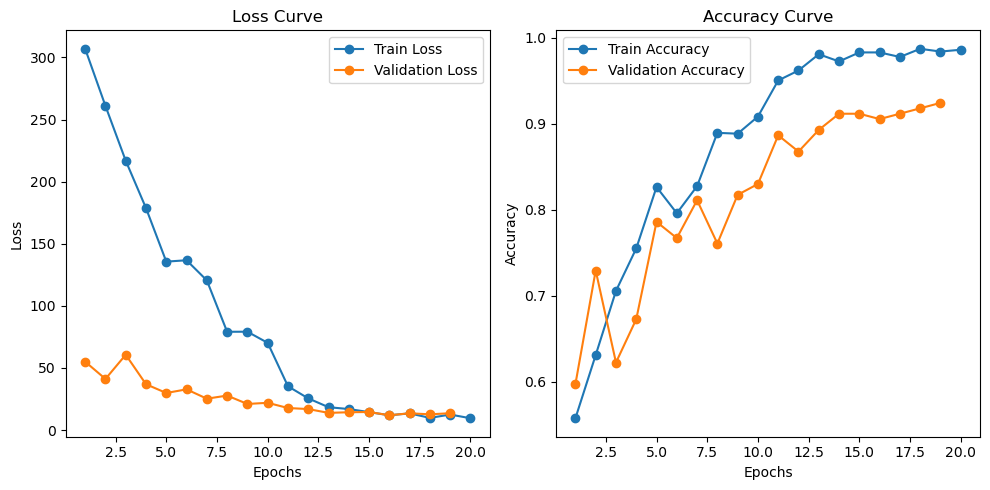

In [27]:
import matplotlib.pyplot as plt

# Number of epochs
epochs = list(range(1, 21))

# Updated Loss and Accuracy values
train_loss = [306.9142, 260.9632, 216.8156, 178.6807, 135.6116, 136.7100, 120.5078, 79.1405, 79.2011, 70.2332, 
              35.2862, 25.5379, 18.4440, 16.9527, 14.4749, 11.9436, 13.4693, 9.8281, 12.5237, 9.5426]

val_loss = [55.0773, 41.1696, 60.6623, 36.9108, 29.8800, 32.8081, 25.2907, 27.7943, 21.0438, 21.9751, 
            17.7814, 16.9343, 13.8657, 14.3771, 14.5806, 11.9533, 13.5414, 12.6843, 13.6061, 13.1658]  

train_acc = [0.5578, 0.6313, 0.7059, 0.7553, 0.8267, 0.7962, 0.8277, 0.8897, 0.8887, 0.9086, 
             0.9506, 0.9622, 0.9811, 0.9727, 0.9832, 0.9832, 0.9779, 0.9874, 0.9842, 0.9863]

val_acc = [0.5975, 0.7296, 0.6226, 0.6730, 0.7862, 0.7673, 0.8113, 0.7610, 0.8176, 0.8302, 
           0.8868, 0.8679, 0.8931, 0.9119, 0.9119, 0.9057, 0.9119, 0.9182, 0.9245, 0.9057] 

# Plot Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Train Loss", marker='o')
plt.plot(epochs[:-1], val_loss[:-1], label="Validation Loss", marker='o')  # Skip last None value
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label="Train Accuracy", marker='o')
plt.plot(epochs[:-1], val_acc[:-1], label="Validation Accuracy", marker='o')  # Skip last None value
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
import torch
import numpy as np

# Evaluate test accuracy
model.eval()
correct = 0
total = 0
true_labels = []
pred_labels = []

with torch.no_grad():
    for videos, labels in test_loader:
        videos, labels = videos.to(device), labels.to(device)
        outputs = model(videos)
        _, preds = torch.max(outputs, 1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())

test_acc = correct / total
print(f"Test Accuracy: {test_acc:.4f}")  # Accuracy in decimal format
print(f"Test Accuracy: {test_acc * 100:.2f}%")  # Accuracy in percentage

Test Accuracy: 0.9329
Test Accuracy: 93.29%


### **Final Model Performance**  

- **Test Accuracy**: **93.29%**, indicating strong generalization on unseen data.  
- **Training-Validation Consistency**: The model maintains high accuracy across train, validation, and test sets.  
- **Computational Constraints**: Due to limited hardware resources, hyperparameter tuning was restricted, which might have further enhanced performance.  

Overall, the model successfully learns human activity recognition with **promising accuracy** despite resource limitations.


## Test Video Prediction Visualization  

In [28]:
# Get the mapping of encoded labels to class names
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize video frames with class names
def visualize_test_video(video_path, true_label, predicted_label, num_frames=5):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_interval = max(1, total_frames // num_frames)  # Select evenly spaced frames

    frames = []
    for i in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * frame_interval)
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        frames.append(frame)

    cap.release()

    # Convert numeric labels to class names
    true_label_name = label_mapping[true_label]
    predicted_label_name = label_mapping[predicted_label]

    # Plot frames
    fig, axes = plt.subplots(1, len(frames), figsize=(15, 5))
    for ax, frame in zip(axes, frames):
        ax.imshow(frame)
        ax.axis("off")

    plt.suptitle(f"Actual: {true_label_name} | Predicted: {predicted_label_name}", fontsize=14)
    plt.show()


In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to extract and display frames
def visualize_test_video(video_path, true_label, predicted_label, num_frames=5):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_interval = max(1, total_frames // num_frames)  # Select evenly spaced frames

    frames = []
    for i in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * frame_interval)
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        frames.append(frame)

    cap.release()

    # Plot frames
    fig, axes = plt.subplots(1, len(frames), figsize=(15, 5))
    for ax, frame in zip(axes, frames):
        ax.imshow(frame)
        ax.axis("off")

    plt.suptitle(f"Actual: {true_label} | Predicted: {predicted_label}", fontsize=14)
    plt.show()


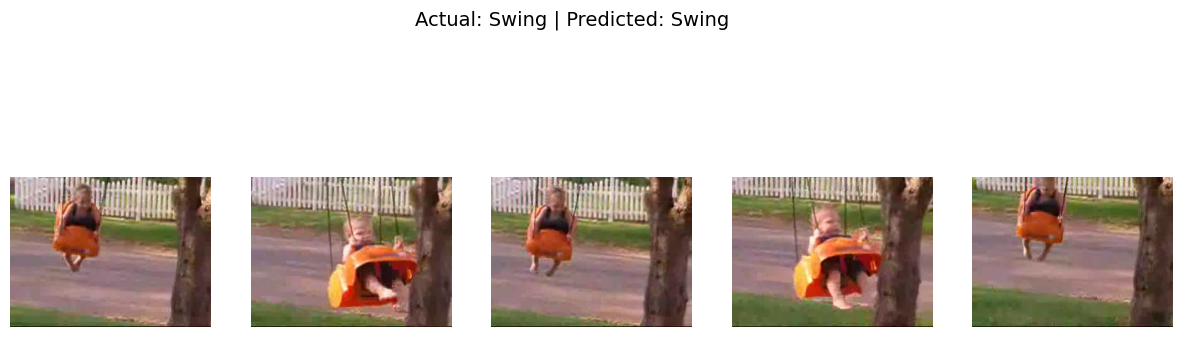

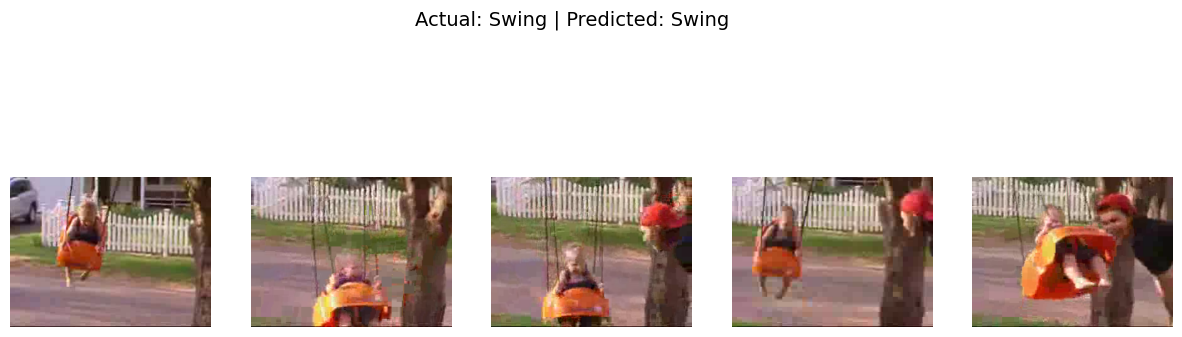

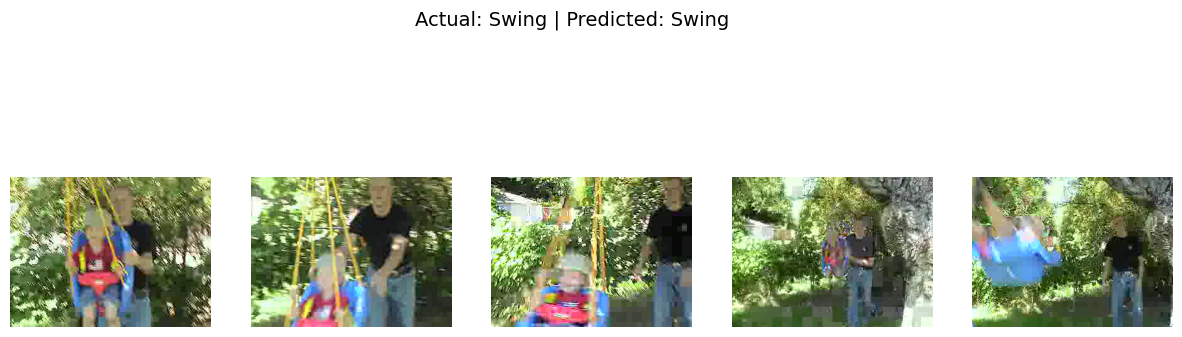

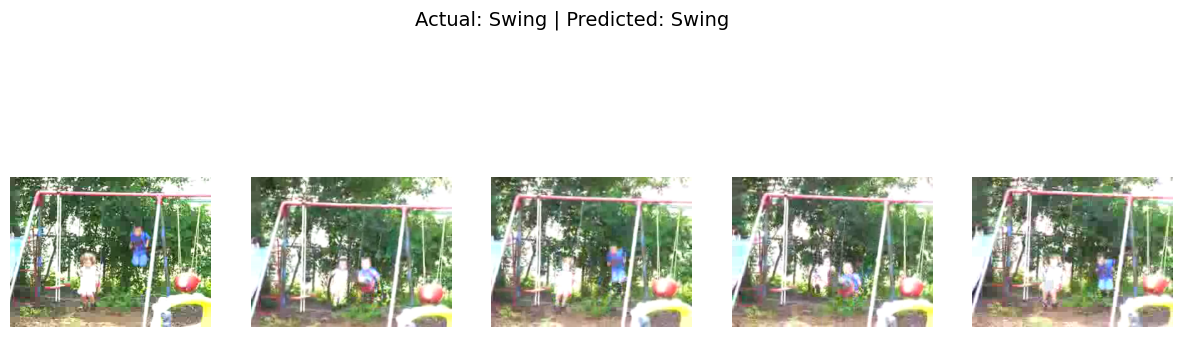

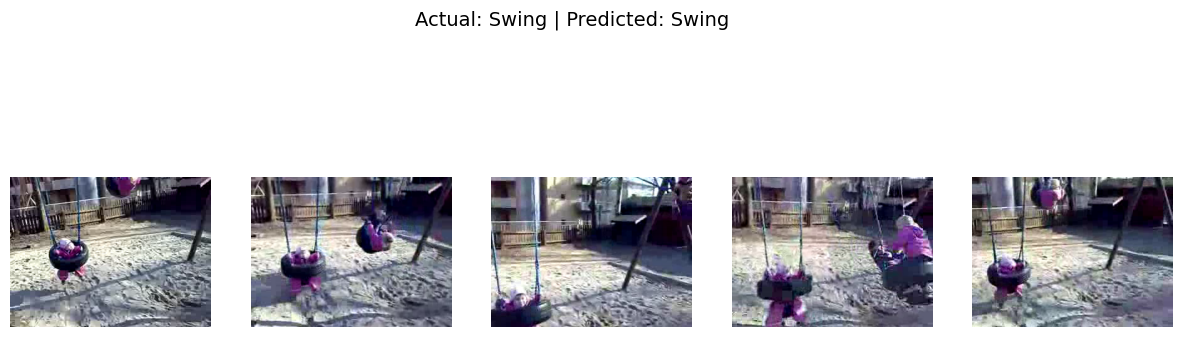

In [ ]:
# Load test videos and show predictions
model.eval()
true_labels = []
pred_labels = []
video_paths = df_test["full_clip_path"].tolist()

with torch.no_grad():
    for idx, (videos, labels) in enumerate(test_loader):
        videos, labels = videos.to(device), labels.to(device)
        outputs = model(videos)
        _, preds = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())

        # Show only first 5 test videos
        if idx < 5:
            visualize_test_video(video_paths[idx], true_labels[idx], pred_labels[idx])


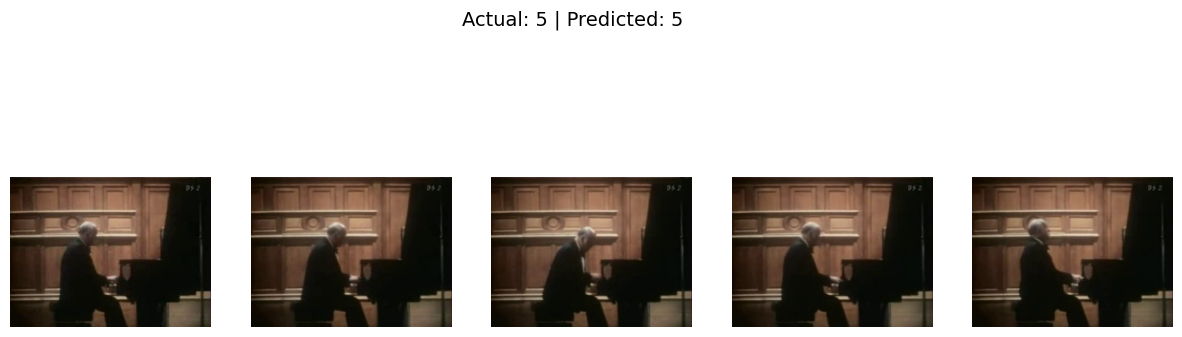

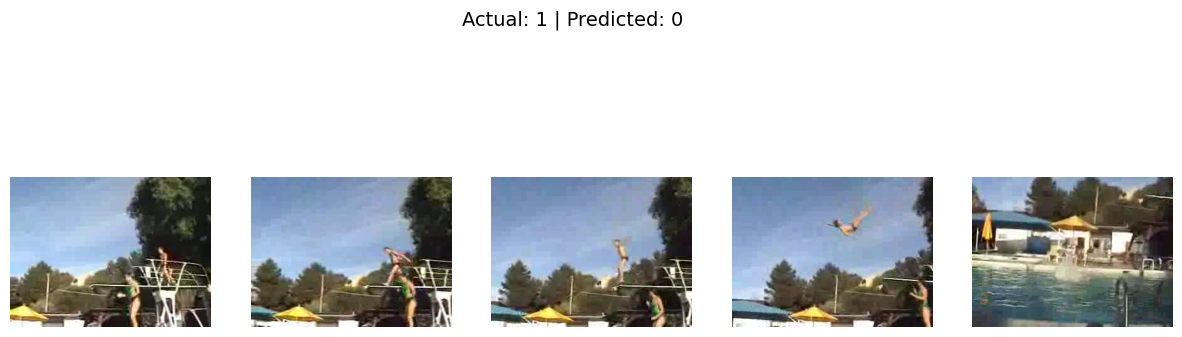

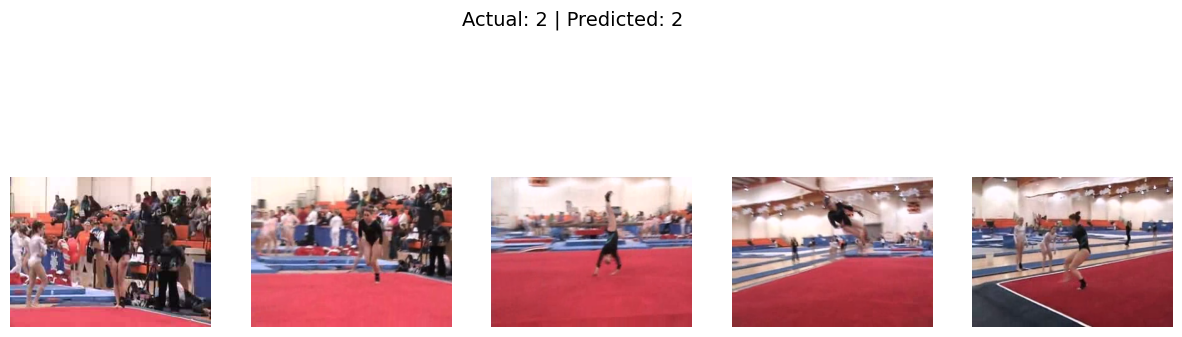

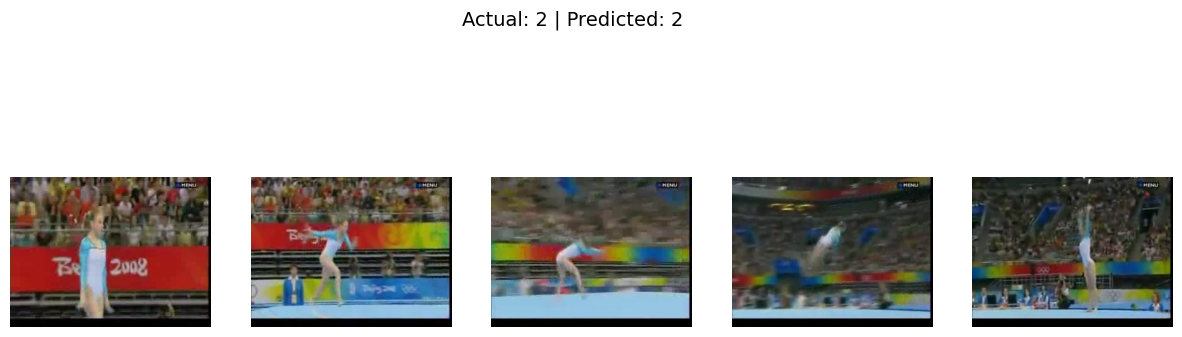

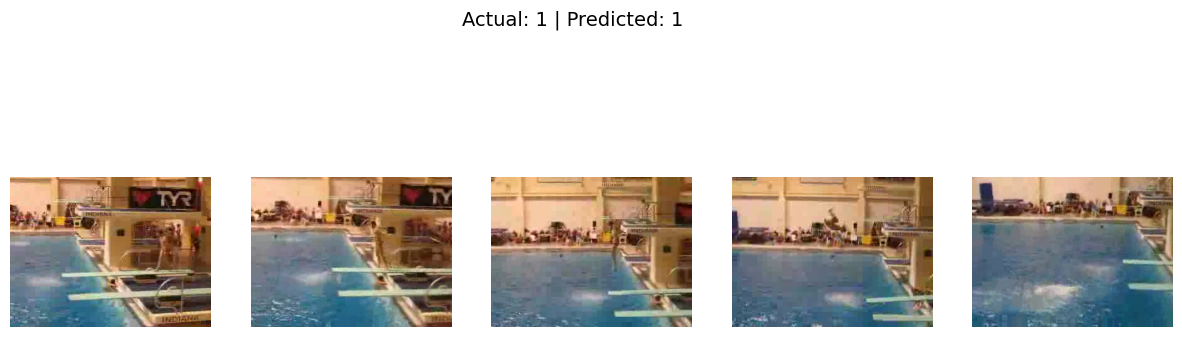

In [31]:
import random

# Load test videos and show random predictions
model.eval()
true_labels = []
pred_labels = []
video_paths = df_test["full_clip_path"].tolist()

# Randomly select 5 indices from the test set
num_samples = min(5, len(video_paths))  # Ensure we don’t exceed dataset size
random_indices = random.sample(range(len(video_paths)), num_samples)

with torch.no_grad():
    for idx in random_indices:
        video, label = test_dataset[idx]  # Get random sample from dataset
        video = video.unsqueeze(0).to(device)  # Add batch dimension and move to device
        label = torch.tensor(label).to(device)

        output = model(video)
        _, pred = torch.max(output, 1)

        true_label = label.cpu().item()
        pred_label = pred.cpu().item()

        true_labels.append(true_label)
        pred_labels.append(pred_label)

        # Visualize the randomly chosen video
        visualize_test_video(video_paths[idx], true_label, pred_label)


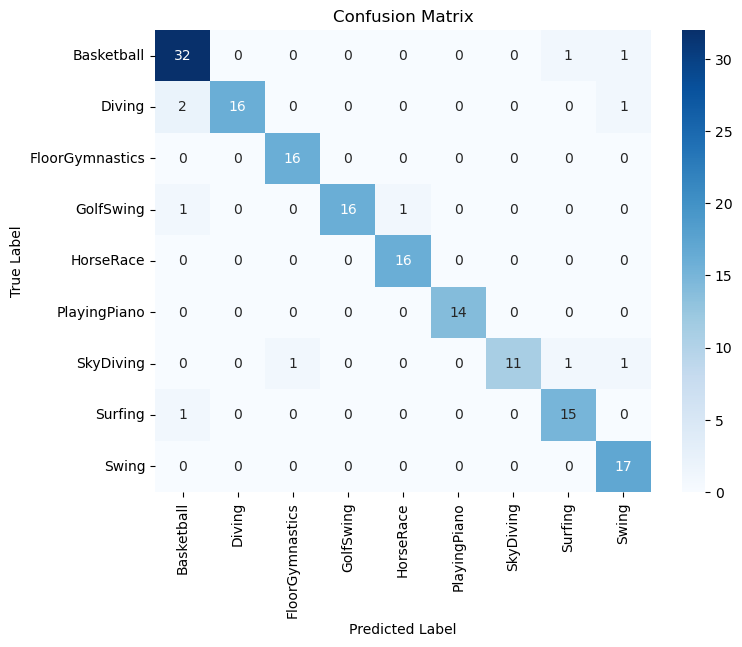

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Save the Model

In [34]:
import torch

# Save the model's state dictionary
model_save_path = "video_classification_model.pth"
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to video_classification_model.pth


### **Conclusion & Next Steps**  

- The **custom 3D CNN model** provided promising results but had limitations due to computational constraints, restricting hyperparameter tuning.  
- To improve accuracy and efficiency, the next step is to implement a **pretrained model** such as ResNet3D.  
- Further enhancements, including **RAG (Retrieval-Augmented Generation) implementation**, will be explored to refine the **Human Activity Recognition (HAR)** process.  
- All upcoming developments will be documented in **HAR.ipynb**.  
